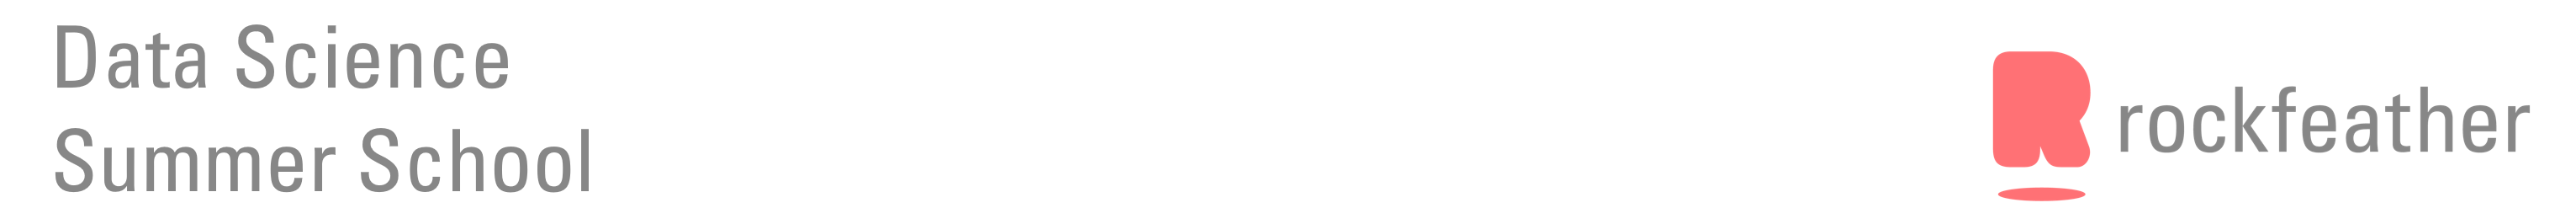

# Week 2 part 2: Using scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing_clean.csv")

# get descriptive statistics of all numeric
df. ...

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

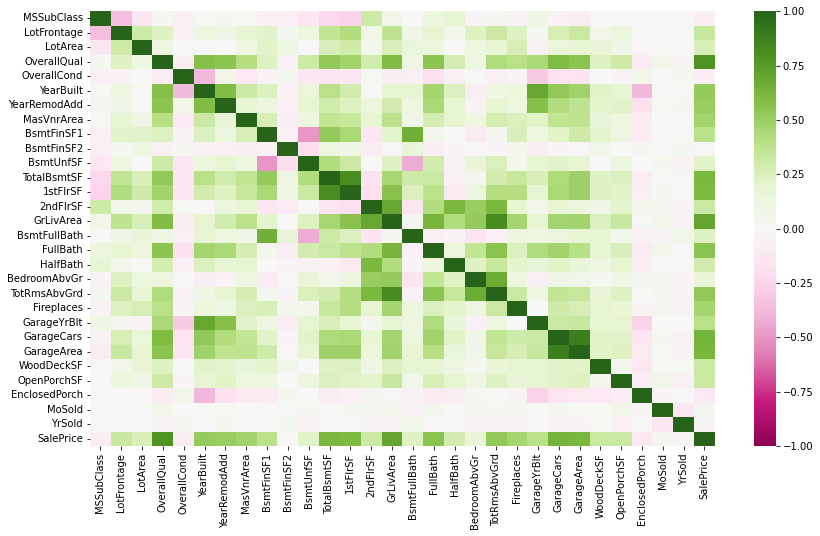

In [3]:
plt.figure(figsize=(14,8))
corr_mat =  # set the variable as the correlation matrix
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='PiYG')

## Single-Feature Prediction

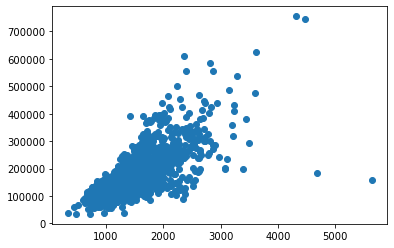

In [4]:
plt.scatter(df['...'], df['SalePrice']) # choose a feature to scatter against SalePrice

In [5]:
X = df[['...']] # insert your feature name
y = df['SalePrice']

In [6]:
# we want to evaluate our model by testing it on new data
from sklearn.model_selection import train_test_split

# Create a train-test split using the above library

In [7]:
# We define our evaluation metrics

def RMSE(y, y_hat):
    # ROOT MEAN SQUARED ERROR
    return np.sqrt(np.mean(np.square(y_hat - y)))

def MAPE(y, y_hat):
    # MEAN ABSOLUTE PERCENTAGE ERROR
    return np.mean(np.abs(y_hat-y)/y)

def metrics(y, y_hat):
    print(f"RMSE: {RMSE(y, y_hat)}")
    print(f"MAPE: {MAPE(y, y_hat)}")

# note that in sklearn.metrics, there is the mean_squared_error() and mean_absolute_percentage_error() functions.

### Linear Regression Model 

In [8]:
import sklearn.linear_model
linModel = sklearn.linear_model.LinearRegression()

In [9]:
linModel.fit(... , ...) # fit the linear model onto our training data (X first, y second)
y_hat = linModel.predict( ... ) # predict on the testing (X) data

In [10]:
metrics(... , ...) # find the metrics between the test data and predicted 

RMSE: 56577.61139351235
MAPE: 0.22200913051747473


### Decision Tree Regressor Model

In [11]:
from sklearn.tree import DecisionTreeRegressor
treeModel = sklearn.tree.DecisionTreeRegressor()

In [12]:
treeModel.fit(... , ...) # fit the decision tree model onto our training data (X first, y second)
y_hat = treeModel.predict( ... ) # predict on the testing (X) data
metrics(... , ...) # find the metrics between the test data and predicted 

RMSE: 76249.76897682347
MAPE: 0.2739061611611639


## Multiple-Feature Prediction

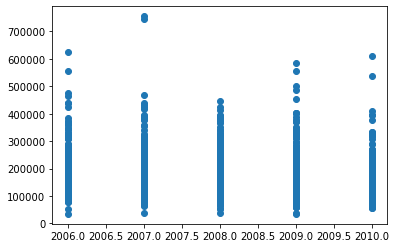

In [13]:
plt.scatter(df['YrSold'], df['SalePrice'])

Should we use `Year Sold` as a categorical feature?

- why yes?
- why not?

In [1]:
# # plot the ground floor living area against the sale price for every year in the dataset
# for yr in df['YrSold'].unique():
#     plt.scatter(df[df['YrSold'] == yr]['GrLivArea'], df[df['YrSold'] == yr]['SalePrice'])
#     plt.ylim(0, 750000)
#     plt.title(yr)
#     plt.show()

### Fitting using a pipeline

Below, we write a function that will:
1. train-test split our data
2. fit a linear regression model on training data, make predictions on test data and evaluate them
3. fit a decision tree regressor on training data, make predictions on test data and evaluate them

(This will save us time as we try multiple features.)

In [15]:
# Function that will:

# 1. train-test split our data
# 2. fit a linear regression model on training data, make predictions on test data and evaluate them
# 3. fit a decision tree regressor on training data, make predictions on test data and evaluate them

...?... run_test(X, y): # how do we create a function?

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    print("\nLinear Regression")
    linModel = sklearn.linear_model.LinearRegression()
    linModel.fit(X_train, y_train)
    metrics(y_test, linModel.predict(X_test))

    print("\nRandom forest regressor")
    treeModel = sklearn.tree.DecisionTreeRegressor()
    treeModel.fit(X_train, y_train)
    metrics(y_test, treeModel.predict(X_test))

We use two features: 
1. Ground Living Area 
2. Year Sold
    - numeric or categorical?

In [16]:
# Ground living area and Year sold as numeric features
X = df[['GrLivArea', 'YrSold']] 
# Target Variable
y = df['SalePrice'] 

run_test(X, y)


Linear Regression
RMSE: 56786.92345992726
MAPE: 0.22362995357565124

Random forest regressor
RMSE: 83085.49794852978
MAPE: 0.3060951977096162


In [17]:
# Ground living area as numeric feature, Year sold as categorical (!)
X = df[['GrLivArea', 'YrSold']] 
X = pd.get_dummies(X, columns=['YrSold'], drop_first=False)

# Target Variable
y = df['SalePrice'] 

run_test(X, y)


Linear Regression
RMSE: 56937.99076718485
MAPE: 0.2250369865532575

Random forest regressor
RMSE: 82083.97577855285
MAPE: 0.2976061225544318


- Would this make sense? The answer is no, however it's a useful thought exercise. 
- We would not do this for a model which we wish to deploy, since for the "category" 2022, we would have no data and we would lose the potential *trend* in `YrSold`. This time element can be a very important aspect of a model.
- What we could do instead is create an **age** variable - we always know how old a house is, and how old it will be in the future!

### Feature Engineering: new bins for features

In [18]:
# create a function that determines the age category based on the age
def categorical_age(x):
    if x < 5:
        return "New"
    elif x < 15:
        return "Medium"
    elif x < 25:
        return "Old"
    elif x < 40: 
        return "Very old"
    else:
        return "Super old"

# Use the YrSold and YrBuilt to create a new feature!
# New feature: AGE
df['age'] = df['YrSold'] - df['YearBuilt']
# New feature: AGE CATEGORY
df['cat_age'] = df['age'].apply(categorical_age)

In [19]:
# Age as numeric feature
X = df[['GrLivArea', 'age']]
# Target var. is SalePrice 
y = df['SalePrice']

run_test(X, y)


Linear Regression
RMSE: 47775.27484144939
MAPE: 0.17602308748914047

Random forest regressor
RMSE: 63652.076432435984
MAPE: 0.20664001991724043


In [20]:
# Age as categorical feature
X = df[['GrLivArea', 'cat_age']]
X = pd.get_dummies(X, columns=['cat_age'])
# Target var. is SalePrice 
y = df['SalePrice']

run_test(X, y)


Linear Regression
RMSE: 47506.03733445232
MAPE: 0.17985527095631235

Random forest regressor
RMSE: 51185.59908396379
MAPE: 0.20143242283497834


Did we do better than just using the `YearBuilt` and `YrSold` features?

In [21]:
X = df[['GrLivArea', 'YearBuilt','YrSold']]
y = df['SalePrice']

run_test(X, y)


Linear Regression
RMSE: 48000.22582301671
MAPE: 0.1780276279636325

Random forest regressor
RMSE: 61642.66147567754
MAPE: 0.20869574769783655


*Using `age` as numeric feature shows to be best option, though by only a small margin.*

# classification

In [22]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [23]:
def categorical_sale_price(x):
    if x < 150000:
        return "cheap"
    elif x < 300000:
        return "Normal"
    else:
        return "Expensive"
    
df['cat_SalePrice'] = df['SalePrice'].apply(categorical_sale_price)

In [24]:
X = df[['GrLivArea', 'age']]
y = df['cat_SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Prepare the data data
X = df[['GrLivArea', 'age']]
y = df['cat_SalePrice']
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

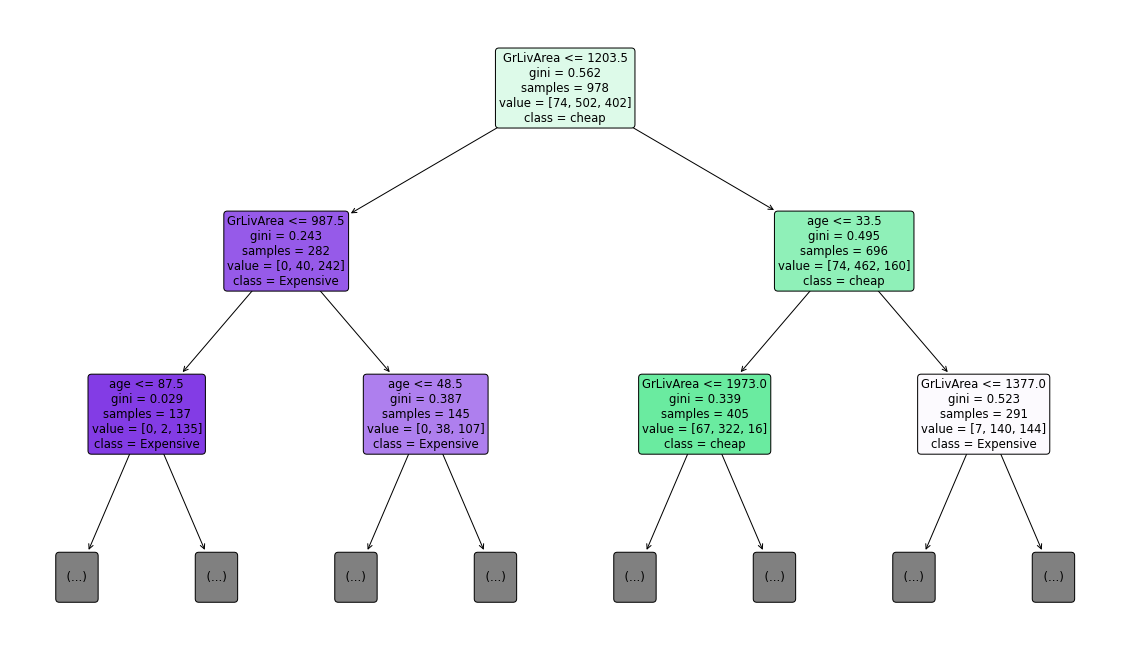

In [26]:
fig = plt.figure(figsize=(20,12))
_ = tree.plot_tree(clf, 
                   feature_names= list(X.columns),  
                   class_names= np.array(df['cat_SalePrice'].unique()),
                   filled= True,
                   max_depth= 2,
                   rounded= True)

Note that to evaluate a classification excercise, we use different metrics than for the regression excercise.

C:\Users\VojtechKurfurst\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


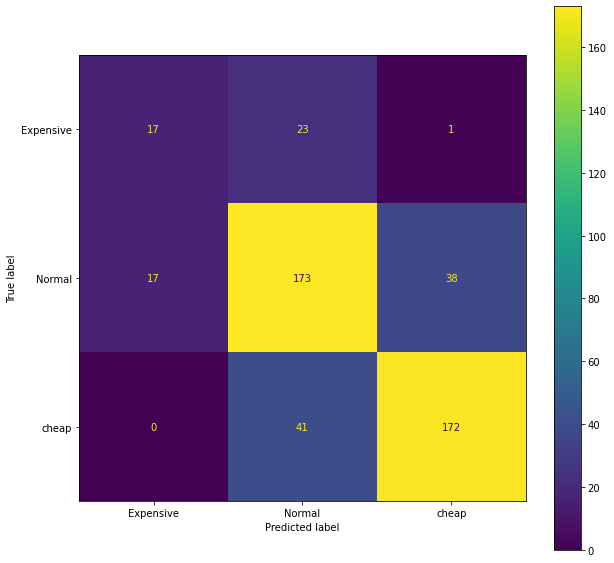

In [27]:
import sklearn.metrics

fig, ax = plt.subplots(figsize=(10, 10))
sklearn.metrics.plot_confusion_matrix(clf, X_test, y_test, ax=ax)